# 데이터 분할

## 1.환경준비

### (1) 라이브러리 불러오기

In [49]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### (2) 데이터 불러오기

In [50]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/airline_satisfaction.csv'
data = pd.read_csv(path)

# 확인
data.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


## 2.학습데이터 크기 조정

### (1) 데이터 일부 추출

In [51]:
# 결측치 제거
data.dropna(inplace=True) 

# 5,000개만 추출
data0 = data.sample(5000, random_state=20) 

### (2) 간단한 전처리

In [52]:
# 불필요한 변수 제거
del_cols = ['id', 'departure/arrival_time_convenient', 'gate_location', 'departure_delay_in_minutes']
data0.drop(del_cols, axis=1, inplace=True)

# 가변수화
dumm_cols = ['gender', 'customer_type', 'type_of_travel', 'class']
data0 = pd.get_dummies(data0, columns=dumm_cols, drop_first=True)

In [53]:
# x, y 분리
target = 'satisfaction'
x = data0.drop(target, axis=1)
y = data0.loc[:, target]

# 데이터 크기 확인
x.shape

(5000, 20)

### (3) 학습데이터 크기 조정

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

* 학습곡선 그리기
    * 데이터를 10건~6010건까지 20건씩 증가시켜가며
    * 그때그때마다 모델을 학습시키고 성능측정 

In [55]:
# 모셀선언
m1 = LogisticRegression()

# Learning Curve 수행
tr_size, tr_sc, val_sc = learning_curve(m1, x, y,
                                        train_sizes=range(10, 4000, 20),
                                        cv=5)     

* 결과 확인하기

In [56]:
# 아래와 같이 학습데이터의 수를 조절
tr_size[:5], tr_size[-5:]

(array([10, 30, 50, 70, 90]), array([3910, 3930, 3950, 3970, 3990]))

In [57]:
# 그때 그때 마다의 학습데이터 성능
# cv(cross validation) = 5 지정했으므로 각 train size 마다 5개씩 성능 결과가 보임
tr_sc[:5], tr_sc[-5:]

(array([[       nan, 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.9       , 0.9       , 0.9       , 0.9       ],
        [0.9       , 0.92      , 0.92      , 0.92      , 0.92      ],
        [0.88571429, 0.9       , 0.9       , 0.9       , 0.9       ],
        [0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889]]),
 array([[0.81636829, 0.83580563, 0.82404092, 0.84347826, 0.82046036],
        [0.82061069, 0.83816794, 0.83969466, 0.8389313 , 0.83994911],
        [0.83594937, 0.82607595, 0.82253165, 0.84      , 0.83822785],
        [0.83148615, 0.83375315, 0.8395466 , 0.84282116, 0.83299748],
        [0.82781955, 0.83984962, 0.83909774, 0.83533835, 0.84310777]]))

In [58]:
# 그때 그때 마다의 검증 데이터 성능 측정
# cv(cross validation) = 5 지정했으므로 각 train size 마다 5개씩 성능 결과가 보임
val_sc[:5], val_sc[-5:]

(array([[  nan, 0.621, 0.592, 0.594, 0.616],
        [0.638, 0.672, 0.675, 0.642, 0.67 ],
        [0.725, 0.792, 0.789, 0.766, 0.755],
        [0.774, 0.782, 0.787, 0.763, 0.761],
        [0.771, 0.808, 0.787, 0.78 , 0.781]]),
 array([[0.808, 0.852, 0.817, 0.826, 0.811],
        [0.806, 0.855, 0.824, 0.828, 0.838],
        [0.841, 0.85 , 0.825, 0.828, 0.84 ],
        [0.825, 0.854, 0.822, 0.833, 0.84 ],
        [0.806, 0.849, 0.822, 0.825, 0.835]]))

In [59]:
# cv 마다 평균 성능 계산
tr_mean_lr = tr_sc.mean(axis=1)
val_mean_lr = val_sc.mean(axis=1)

tr_size[:5], tr_sc[:5], tr_mean_lr[:5]

(array([10, 30, 50, 70, 90]),
 array([[       nan, 1.        , 1.        , 1.        , 1.        ],
        [1.        , 0.9       , 0.9       , 0.9       , 0.9       ],
        [0.9       , 0.92      , 0.92      , 0.92      , 0.92      ],
        [0.88571429, 0.9       , 0.9       , 0.9       , 0.9       ],
        [0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.88888889]]),
 array([       nan, 0.92      , 0.916     , 0.89714286, 0.88888889]))

* 결과 시각화

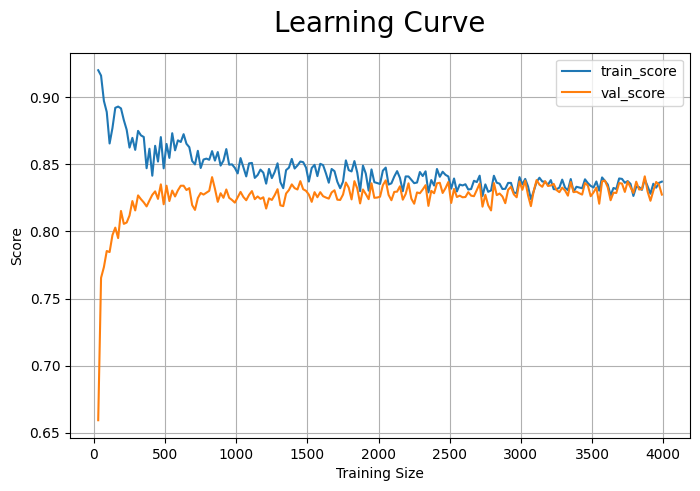

In [60]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, tr_mean_lr, label = 'train_score')
plt.plot(tr_size, val_mean_lr, label = 'val_score')

# 꾸미기
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend()
plt.grid()
plt.show()

### (4) 실습
* Decision Tree 모델로 학습곡선 테스트를 수행해 봅시다.
    * 실험1 : max_depth = 3 으로 모델을 생성한 후 학습데이터 크기에 따른 성능 곡선을 그려봅시다.
    * 실험2 : max_depth = 5 모델 생성후 학습곡선을 그리되, 위에서 그렸던 로지스틱회귀모델의 val_score 곡선, 실험 1의 val_score 곡선과 비교하는 그래프를 그려봅시다.

#### 1) max_depth=3

In [61]:
# 모셀선언
m2 = DecisionTreeClassifier(max_depth=3)

# Learning Curve 수행
tr_size, tr_sc, val_sc2 = learning_curve(m2, x, y,
                                        train_sizes=range(10, 4000, 20),
                                        cv=5)     

In [62]:
# CV 결과 --> 평균
tr_mean_dt3 = tr_sc.mean(axis=1)
val_mean_dt3 = val_sc2.mean(axis=1)

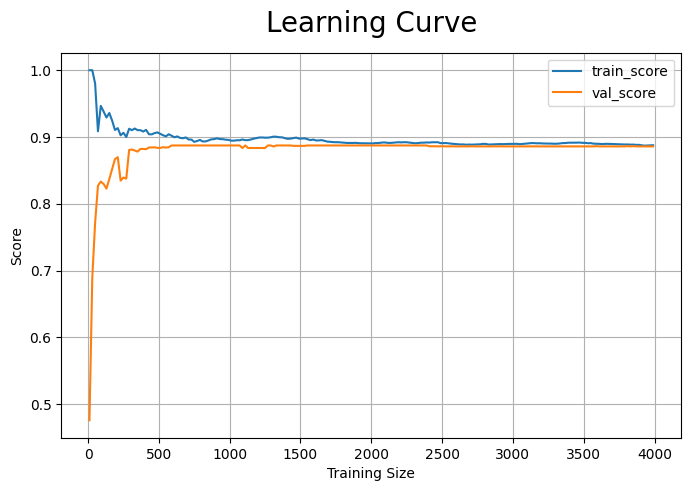

In [63]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, tr_mean_dt3, label = 'train_score')
plt.plot(tr_size, val_mean_dt3, label = 'val_score')

# 꾸미기
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend()
plt.grid()
plt.show()

#### 2) max_depth=5

In [64]:
# 모셀선언
m3 = DecisionTreeClassifier(max_depth=5)

# Learning Curve 수행
tr_size, tr_sc, val_sc3 = learning_curve(m3, x, y,
                                        train_sizes=range(10, 4000, 20),
                                        cv=5)     

In [65]:
# CV 결과 --> 평균
tr_mean_dt5 = tr_sc.mean(axis=1)
val_mean_dt5 = val_sc3.mean(axis=1)

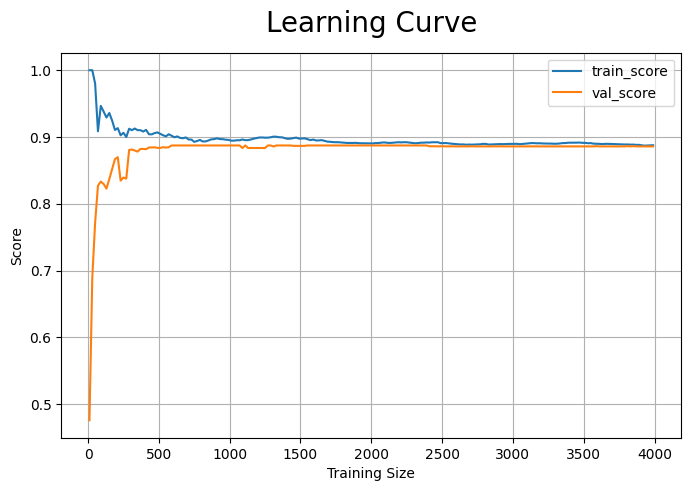

In [66]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, tr_mean_dt3, label = 'train_score')
plt.plot(tr_size, val_mean_dt3, label = 'val_score')

# 꾸미기
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend()
plt.grid()
plt.show()

#### 3) depth = 3, depth = 5, logistic regression 모델 비교

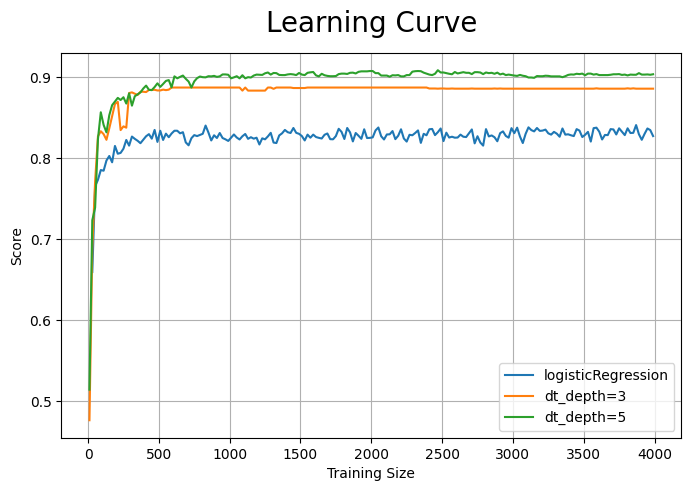

In [67]:
# 시각화
plt.figure(figsize=(8, 5))
plt.plot(tr_size, val_mean_lr, label = 'logisticRegression')
plt.plot(tr_size, val_mean_dt3, label = 'dt_depth=3')
plt.plot(tr_size, val_mean_dt5, label = 'dt_depth=5')

# 꾸미기
plt.title('Learning Curve', size=20, pad=15)
plt.ylabel('Score')
plt.xlabel('Training Size')
plt.legend()
plt.grid()
plt.show()

----

## [참조] 4.시계열 데이터의 분할
* 시계열 데이터의 분할은 각자 추후에 공부해보시기 바랍니다.

In [68]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

### (1) 데이터준비

* 데이터 불러오기

In [69]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/retail_demand2.csv'
data = pd.read_csv(path, usecols = ['date','sales','tot_sales','comp_sales'])
data = data.loc[data['date']<= '2015-12-31'].reset_index(drop = True)
data.head(10)

,date,sales,tot_sales,comp_sales
0,2013-01-01,45,456,43
1,2013-01-02,53,474,57
2,2013-01-03,65,519,45
3,2013-01-04,66,527,45
4,2013-01-05,97,575,55
5,2013-01-06,83,573,56
6,2013-01-07,46,402,35
7,2013-01-08,53,459,50
8,2013-01-09,57,479,41
9,2013-01-10,78,527,68


* 간단한 전처리

In [70]:
target = 'sales'
x = data.drop([target,'date'], axis=1)
y = data.loc[:, target]

### (2) train, val 분할
* 시간의 흐름에 맞게 분할하기
    * train_test_split(  ,  ,  ,  shuffle = False)
        * train_test_split은 기본적으로 데이터를 섞어서 분할합니다.
        * shuffle = False로 지정하면 입력된 데이터셋을 섞지 않고 그대로 분할합니다.

In [71]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 200,
                                                  shuffle = False)

In [72]:
x.tail()

,tot_sales,comp_sales
1090,740,78
1091,526,46
1092,618,58
1093,614,69
1094,657,65


In [73]:
x_val.tail()

,tot_sales,comp_sales
1090,740,78
1091,526,46
1092,618,58
1093,614,69
1094,657,65


In [74]:
x.tail()

,tot_sales,comp_sales
1090,740,78
1091,526,46
1092,618,58
1093,614,69
1094,657,65


### (3) 교차검증을 위한 분할

* 다음의 조건으로 Cross Validation을 수행하겠습니다.
    * 3-fold
    * Validation 기간 30일

* TimeSeriesSplit : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html

In [75]:
from sklearn.model_selection import TimeSeriesSplit

In [76]:
x.shape

(1095, 2)

* 교차검증 오브젝트 선언하기

In [77]:
# validation set size
val_size = 30
nfold = 3

tscv = TimeSeriesSplit(n_splits = nfold, test_size = val_size)
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=30)

* 데이터셋으로 부터 교차검증을 위한 인덱스 만들기

In [78]:
# .split을 이용하여 fold 하나씩 인덱스들을 뽑아 낼 수 있음.
for train_index, val_index in tscv.split(x):
    print("Train:", train_index, "Val:", val_index)

Train: [   0    1    2 ... 1002 1003 1004] Val: [1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018
 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032
 1033 1034]
Train: [   0    1    2 ... 1032 1033 1034] Val: [1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048
 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062
 1063 1064]
Train: [   0    1    2 ... 1062 1063 1064] Val: [1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078
 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092
 1093 1094]


* 교차검증용 인덱스로 교차검증 코드 구현하기

In [79]:
# 모델 선언
model = DecisionTreeRegressor()

In [80]:
rmse, mae, mape = [],[],[]
pred = []

for train_index, val_index in tscv.split(x):

    # 인덱스로 데이터 분할
    x_train, y_train = x.iloc[train_index], y.iloc[train_index]
    x_val, y_val = x.iloc[val_index], y.iloc[val_index]

    # 학습
    model.fit(x_train, y_train)

    # 예측
    pr = model.predict(x_val)
    pred += list(pr)

    # 평가
    rmse.append(mean_squared_error(y_val, pr, squared = False))
    mae.append(mean_absolute_error(y_val, pr))
    mape.append(mean_absolute_percentage_error(y_val, pr))

np.mean(rmse), np.mean(mae), np.mean(mape)

(13.551440185685381, 10.988888888888889, 0.10833693452344141)

* 실제값과 예측 결과 시각화

In [81]:
# 날짜 축 데이터 준비하기
date_list = pd.to_datetime(data['date'][-(val_size)*nfold:])
date_list

1005   2015-10-03
1006   2015-10-04
1007   2015-10-05
1008   2015-10-06
1009   2015-10-07
          ...    
1090   2015-12-27
1091   2015-12-28
1092   2015-12-29
1093   2015-12-30
1094   2015-12-31
Name: date, Length: 90, dtype: datetime64[ns]

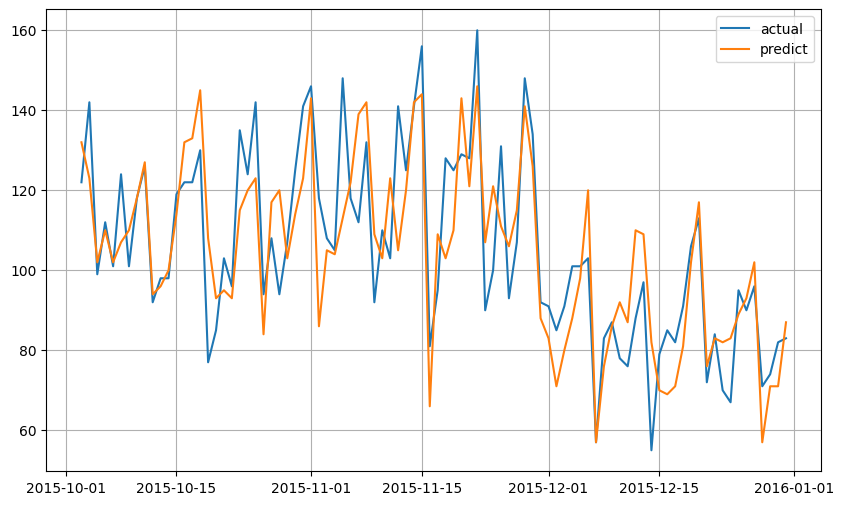

In [82]:
# 시각화
plt.figure(figsize = (10,6))
plt.plot(date_list, y.iloc[-1* val_size*nfold: ].values, label = 'actual')
plt.plot(date_list, pred, label = 'predict')
plt.legend()
plt.grid()
plt.show()